In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

노트북 가격 예측

In [2]:
df=pd.read_csv("./laptop_price.csv")

In [3]:
df.head(3)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Weight,Price_euros
0,Apple,Ultrabook,13.3,2560,5,8,256,1.37,1339.69
1,Apple,Ultrabook,13.3,1440,5,8,256,1.34,898.94
2,HP,Notebook,15.6,1920,5,8,512,1.86,575.00


In [5]:
df.shape

(1086, 9)

In [6]:
df.isnull().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Weight              0
Price_euros         0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1086 entries, 0 to 1085
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1086 non-null   object 
 1   TypeName          1086 non-null   object 
 2   Inches            1086 non-null   float64
 3   ScreenResolution  1086 non-null   int64  
 4   Cpu               1086 non-null   int64  
 5   Ram               1086 non-null   int64  
 6   Memory            1086 non-null   int64  
 7   Weight            1086 non-null   float64
 8   Price_euros       1086 non-null   float64
dtypes: float64(3), int64(4), object(2)
memory usage: 76.5+ KB


In [8]:
df['Price_euros'].describe()

count    1086.000000
mean     1237.558168
std       663.200863
min       339.000000
25%       749.000000
50%      1096.080000
75%      1582.750000
max      6099.000000
Name: Price_euros, dtype: float64

<Axes: >

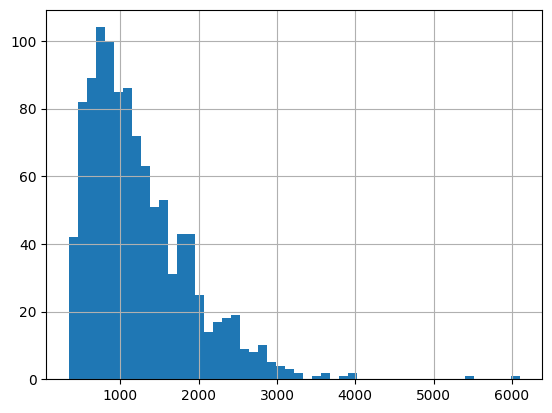

In [9]:
df['Price_euros'].hist(bins=50)

C:\Users\rosie\AppData\Local\Temp\ipykernel_18064\928483430.py:6: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df[numerical_columns].hist(ax=ax)


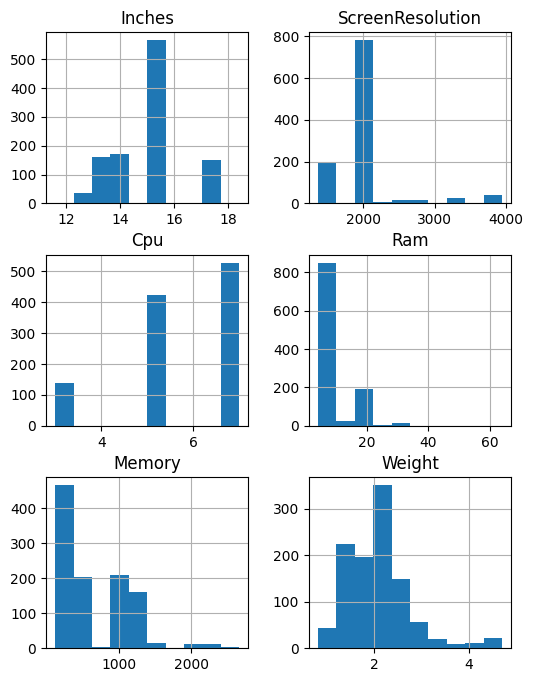

In [10]:

numerical_columns=['Inches','ScreenResolution','Cpu',
                   'Ram','Memory','Weight']
fig=plt.figure(figsize=(6,8))
ax=fig.gca()

df[numerical_columns].hist(ax=ax)
plt.show()

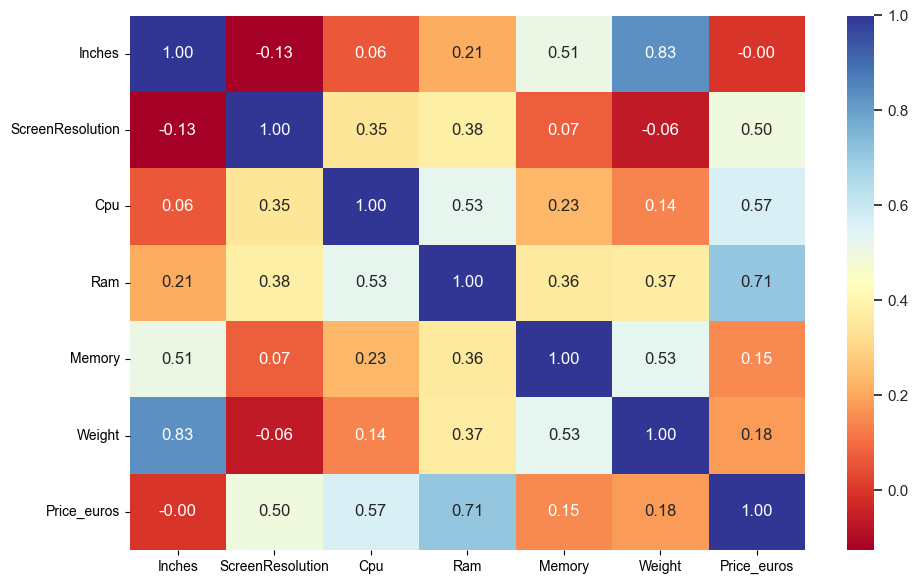

In [11]:
cols = ['Inches','ScreenResolution','Cpu',
        'Ram','Memory','Weight','Price_euros']
corr = df[cols].corr(method = 'pearson')
fig=plt.figure(figsize=(10,6))
ax=fig.gca()
sns.set(font_scale =1)
heatmap=sns.heatmap(corr.values, annot = True,fmt='.2f',
                    annot_kws={'size':12},yticklabels= cols, 
                    xticklabels=cols, ax=ax,cmap="RdYlBu")
plt.tight_layout()
plt.show()

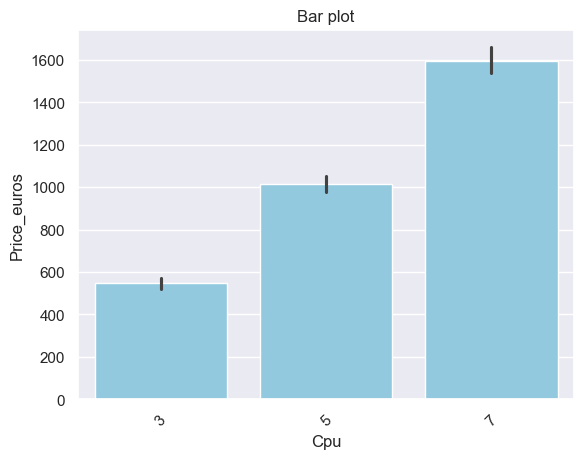

In [12]:
sns.barplot(data=df,x='Cpu',y='Price_euros',color='skyblue')
plt.title('Bar plot')
plt.xticks(rotation=45)
plt.show()

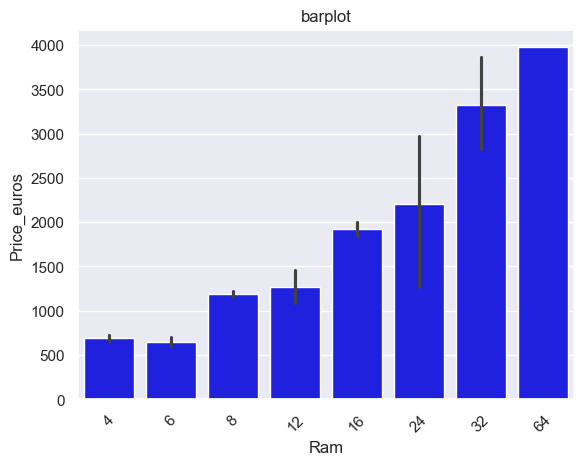

In [13]:
sns.barplot(data=df,x='Ram',y='Price_euros',color='blue')
plt.title('barplot')
plt.xticks(rotation=45)
plt.show()

In [16]:
df['Company'].value_counts()

Company
Dell         282
Lenovo       249
HP           224
Asus         113
Acer          67
MSI           54
Toshiba       47
Apple         16
Razer          7
Samsung        7
Microsoft      5
Xiaomi         4
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: count, dtype: int64

<Axes: xlabel='Price_euros', ylabel='Company'>

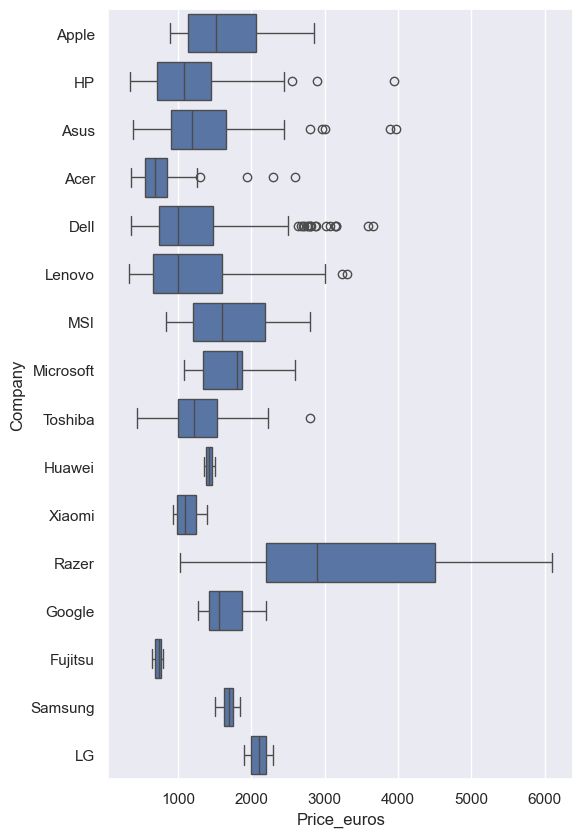

In [19]:
fig=plt.figure(figsize=(6,10))
sns.boxplot(x='Price_euros',y='Company',data=df)

In [17]:
df['TypeName'].value_counts()

TypeName
Notebook              572
Gaming                199
Ultrabook             182
2 in 1 Convertible    102
Workstation            26
Netbook                 5
Name: count, dtype: int64

<Axes: xlabel='Price_euros', ylabel='TypeName'>

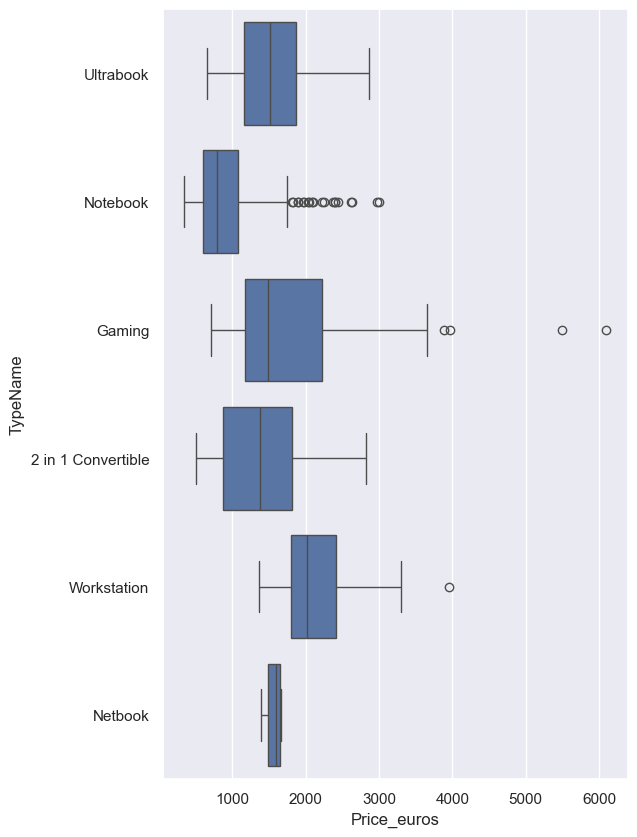

In [20]:
fig=plt.figure(figsize=(6,10))
sns.boxplot(x='Price_euros',y='TypeName',data=df)

In [168]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

scale_columns=['Inches','ScreenResolution',
               'Cpu','Ram','Memory','Weight']
df[scale_columns]=scaler.fit_transform(df[scale_columns])
df[scale_columns].head(3)

,Inches,ScreenResolution,Cpu,Ram,Memory,Weight
0,-1.394319,1.257902,-0.51702,-0.202659,-1.017926,-1.046814
1,-1.394319,-1.035666,-0.51702,-0.202659,-1.017926,-1.090896
2,0.357117,-0.052708,-0.51702,-0.202659,-0.462729,-0.326810


In [169]:
from sklearn.model_selection import train_test_split

X = df[scale_columns]
y = df['Price_euros']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [170]:
X_train.shape,y_train.shape

((868, 6), (868,))

In [171]:
X_test.shape,y_test.shape

((218, 6), (218,))

In [172]:
y_train

433      639.00
876     1725.00
659      999.00
2        575.00
1060    1900.00
         ...   
847     1449.00
715      787.00
905      481.98
235      880.00
1061     490.00
Name: Price_euros, Length: 868, dtype: float64

In [174]:
X_train

,Inches,ScreenResolution,Cpu,Ram,Memory,Weight
433,0.357117,-0.052708,0.922681,-0.981732,-0.488753,0.172785
876,-0.861273,-0.052708,0.922681,-0.202659,-0.801052,-0.899875
659,0.357117,-0.052708,0.922681,-0.981732,0.647667,0.466665
2,0.357117,-0.052708,-0.517020,-0.202659,-0.462729,-0.326810
1060,1.651656,-0.052708,0.922681,1.355485,1.142139,2.817701
...,...,...,...,...,...,...
847,-0.861273,-0.052708,0.922681,-0.202659,-0.801052,-0.958651
715,0.357117,-0.052708,0.922681,-0.202659,-0.801052,0.319725
905,0.357117,-1.187205,-1.956720,-0.981732,-0.488753,-0.032930
235,0.357117,-0.052708,0.922681,-0.202659,-0.801052,-0.047624


In [175]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['features'] = X_train.columns
vif["VIF Factor"] = [variance_inflation_factor(X_train.values, i) 
                     for i in range(X_train.shape[1])]
vif.round(1) 

,features,VIF Factor
0,Inches,3.5
1,ScreenResolution,1.3
2,Cpu,1.4
3,Ram,1.8
4,Memory,1.5
5,Weight,3.8


In [176]:
from sklearn import linear_model

lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)

pred_test = lr.predict(X_test)

In [177]:
print(lr.coef_)

[-152.05592476  147.7151029   150.10639186  349.52403786  -59.81983427
  127.94877883]


In [178]:
coefs = pd.DataFrame(zip(df[scale_columns].columns, lr.coef_), columns = ['feature', 'coefficients'])
coefs_new = coefs.reindex(coefs.coefficients.abs().sort_values(ascending=False).index)
coefs_new

,feature,coefficients
3,Ram,349.524038
0,Inches,-152.055925
2,Cpu,150.106392
1,ScreenResolution,147.715103
5,Weight,127.948779
4,Memory,-59.819834


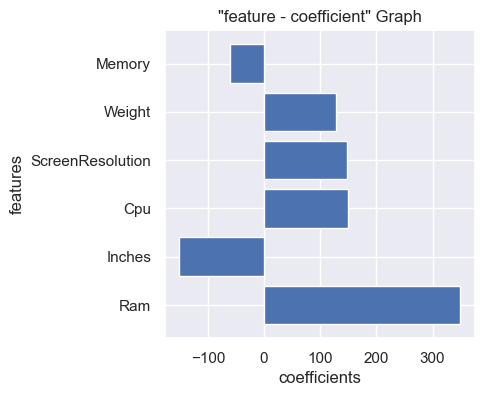

In [185]:
plt.figure(figsize = (4, 4))

plt.barh(coefs_new['feature'], coefs_new['coefficients'])
plt.title('"feature - coefficient" Graph')
plt.xlabel('coefficients')
plt.ylabel('features')
plt.show()

In [180]:
import statsmodels.api as sm

X_train2 = sm.add_constant(X_train)


model2 = sm.OLS(y_train, X_train2).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Price_euros   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     254.9
Date:                Fri, 12 Apr 2024   Prob (F-statistic):          4.50e-187
Time:                        12:43:41   Log-Likelihood:                -6435.2
No. Observations:                 868   AIC:                         1.288e+04
Df Residuals:                     861   BIC:                         1.292e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1239.9309     13.682     90.627      0.000    1213.077    1266.784
Inches            -152.0559     25.405     -5.985      0.000    -201.918    -102.193
ScreenResolution   147.7151     15.560      9.493      0.000     117.175     178.255
Cpu                150.1064     16.340      9.186      0.000     118.035     182.178
Ram                349.5240     18.004     19.413      0.000     314.186     384.862
Memory             -59.8198     17.155     -3.487      0.001     -93.491     -26.149
Weight             127.9488     26.981      4.742      0.000      74.992     180.905
==============================================================================
Omnibus:                      160.226   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              581.099
Skew:                           0.847   Prob(JB):                    6.54e-127
Kurtosis:                       6.633   Cond. No.                         4.12
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [181]:
df = pd.DataFrame({'actual': y_test, 'prediction': pred_test})
df = df.sort_values(by='actual').reset_index(drop=True)
df.head()

,actual,prediction
0,345.99,292.847937
1,390.00,337.969761
2,398.99,388.731813
3,409.00,592.333323
4,415.00,573.413456


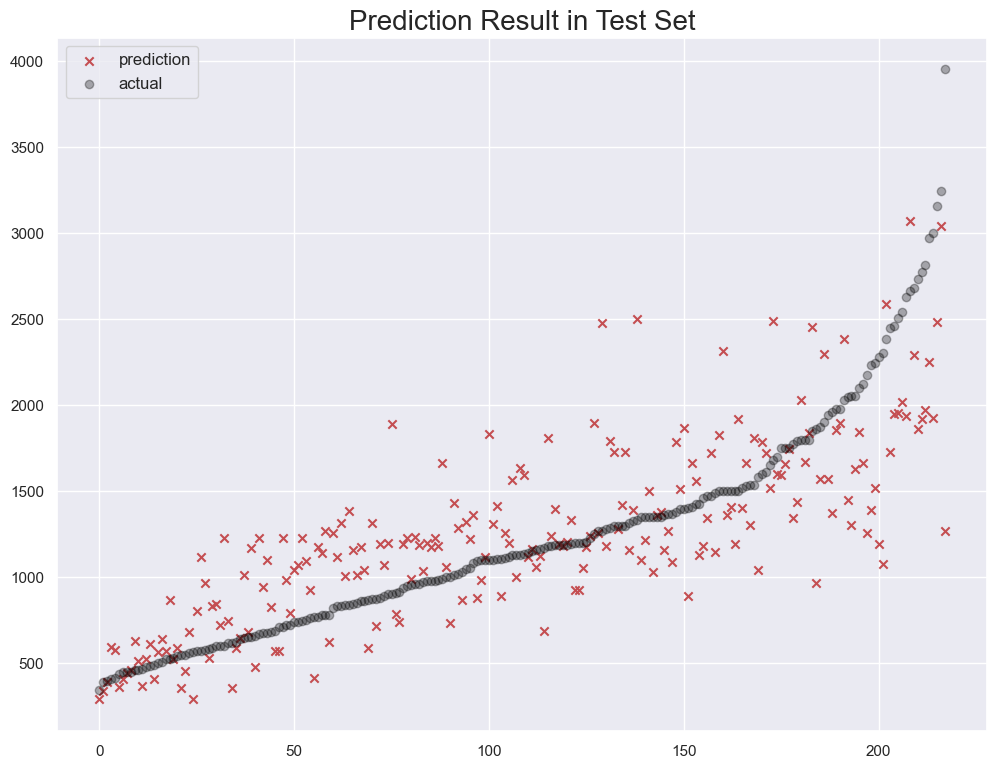

In [188]:
plt.figure(figsize=(12, 9))
plt.scatter(df.index, df['prediction'], marker='x', color='r')
plt.scatter(df.index, df['actual'], alpha=0.3, marker='o', color='black')
plt.title("Prediction Result in Test Set", fontsize=20)
plt.legend(['prediction', 'actual'], fontsize=12)
plt.show()

In [184]:
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

0.6398417221962899
0.5445499616737064
